        textID                                               text sentiment  \
0   f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1   96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2   eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3   01082688c6                                        happy bday!  positive   
4   33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
5   726e501993                    that`s great!! weee!! visitors!  positive   
6   261932614e            I THINK EVERYONE HATES ME ON HERE   lol  negative   
7   afa11da83f   soooooo wish i could, but im in school and my...  negative   
8   e64208b4ef   and within a short time of the last clue all ...   neutral   
9   37bcad24ca   What did you get?  My day is alright.. haven`...   neutral   
10  24c92644a4  My bike was put on hold...should have known th...  negative   
11  43b390b336                          I checked.  

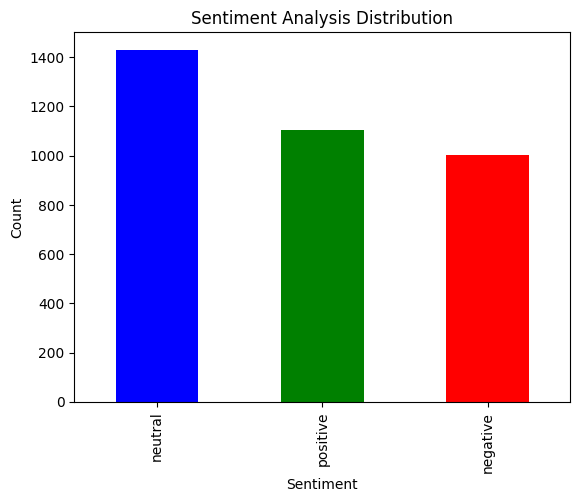

Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.59      0.63      1001
     neutral       0.60      0.68      0.64      1430
    positive       0.73      0.68      0.70      1103

    accuracy                           0.66      3534
   macro avg       0.67      0.65      0.66      3534
weighted avg       0.66      0.66      0.66      3534

Accuracy of the model: 65.51%


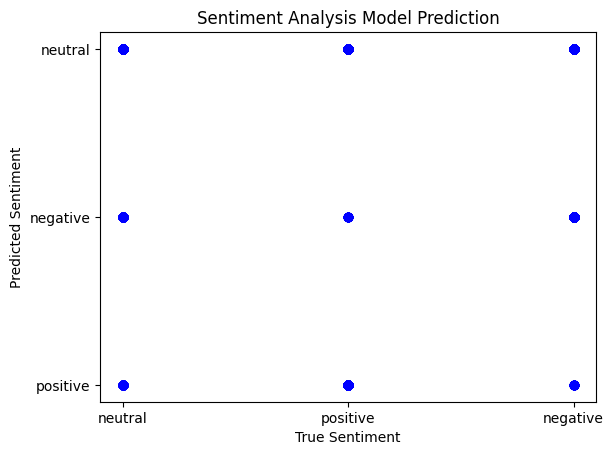

In [5]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the datasets
train_path = '/content/train.csv'  # Adjust the path as necessary
test_path = '/content/test.csv'    # Adjust the path as necessary
train_df = pd.read_csv(train_path, encoding='ISO-8859-1')
test_df = pd.read_csv(test_path, encoding='ISO-8859-1')

# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis if not already labeled
if 'sentiment' not in df.columns:
    df['sentiment'] = df['text'].apply(get_sentiment)

#Displays the 1st 20 rows
print(df.head(20))

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print(sentiment_counts)

# Plot the sentiment counts as a bar chart
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Ensure there are no missing values in 'text' or 'sentiment'
train_df.dropna(subset=['text', 'sentiment'], inplace=True)
test_df.dropna(subset=['text', 'sentiment'], inplace=True)

# Splitting is not needed since we have separate train and test datasets
X_train = train_df['text']
y_train = train_df['sentiment']
X_test = test_df['text']
y_test = test_df['sentiment']

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)

# Predict the sentiment on the test data
y_pred = classifier.predict(X_test_counts)

# Compare predicted and actual sentiments
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

# Plotting the results
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.3, color='blue')
ax.set_xlabel('True Sentiment')
ax.set_ylabel('Predicted Sentiment')
ax.set_title('Sentiment Analysis Model Prediction')
plt.show()
